**Sentiment Analysis for Customer Feedback Insight**

In [20]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

In [21]:
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [22]:
data = pd.read_csv(r"/content/shopping_behavior_updated.csv")

data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [23]:
print(data.shape)

(3900, 18)


In [24]:
features = data.iloc[:, 2].values
labels = data.iloc[:, 1].values

In [25]:
processed_features = []
for sentence in range(0, len(features)):

    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    processed_feature= re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    processed_feature= re.sub(r'^b\s+', '', processed_feature)

    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [26]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

predictions = text_classifier.predict(X_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print(accuracy_score(y_test, predictions))

0.019230769230769232


In [28]:
import sklearn
from sklearn import metrics
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


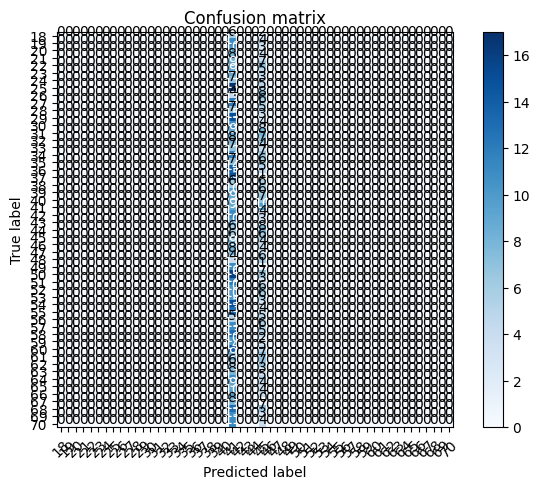

In [30]:
unique_labels = np.unique(y_test)
cm = metrics.confusion_matrix(y_test, predictions, labels=unique_labels)
plot_confusion_matrix(cm, classes=unique_labels)